<a href="https://colab.research.google.com/github/javascript-queen/ML_Kaggle_Project_GiveMeSomeCredit/blob/main/XGBClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧧 Bank delinquency on a loan - Банковская просрочка по кредиту**

**The dataset contains information about the clients of a certain bank.**
Your task is to predict the target variable according to various characteristics of clients - whether the client had a delay of 90 or more days or not (and if he/she did have a delay, the bank will not issue a loan to this client, otherwise it would)

**Датасет содержит информацию о клиентах некоторого банка.**  
Ваша задача состоит в том, чтобы по различным характеристикам клиентов спрогнозировать целевую переменную - имел клиент просрочку 90 и более дней или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет)

## **1️⃣ Libraries' import, consants - Импорт библиотек и констант**

In [1]:
import numpy as np # math
import pandas as pd # tabular data: processing, cleaning, primary analysis ...
import seaborn as sns # cool graphs
import matplotlib.pyplot as plt # graphs

In [2]:
RANDOM_STATE = 42 # taking into account the same data each time

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/credit_scoring.csv" # importing data

## **2️⃣ Datа loading and data review - Загрузка и описание данных**

### ✅ Loading - Загрузка

In [4]:
# Loading data (pandas)
df = pd.read_csv(DATASET_PATH)

### ✅ Data description - Описание данных

**Target varible - Целевая переменная**
- `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

**Features - Признаки**
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: **сколько раз за последние 2 года** наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `NumberRealEstateLoansOrLines`: количество кредиов (в том числе под залог жилья)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: **сколько раз за последние 2 года** заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

In [5]:
# Information about columns (empty strings, data types) - Информация о столбцах (пустые строки, типы данных)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

❗️We have 2 objects in data

❗️Два объекта в данных:

In [6]:
df.describe(include='object')

,RealEstateLoansOrLines,GroupAge
count,150000,150000
unique,5,5
top,A,d
freq,140048,47268


❗️As we see there are letters "A" or letter "d", which are non-numeric.

❗️Как мы видим: присутствуют буквы "A" или "d".

In [7]:
# First outputs from the dataset - # Посмотреть данные из датасета (первые строки)

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d


In [8]:
# The dataset size - Размер датасета

df.shape

(150000, 12)

❗️Converting objects into numeric data type.

❗️Преобразование объектов в числовой тип данных.

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [10]:
df = Encoder(df)

In [11]:
df.sample(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
84041,0,0.528827,53.0,0,1.073525,3100.0,14,0,0,0.0,1,3
135673,0,0.028799,56.0,0,1119.000000,NaN,5,0,0,NaN,0,3
76804,0,0.073139,68.0,0,0.290011,6416.0,15,0,0,0.0,0,4
112459,0,0.012999,82.0,0,8.000000,NaN,2,0,0,0.0,0,4
60678,0,0.309279,45.0,0,0.151607,13600.0,7,0,0,3.0,0,2
41878,0,0.000000,NaN,0,899.000000,NaN,4,0,0,NaN,0,4
128242,0,1.000000,NaN,0,0.186528,6813.0,3,0,0,0.0,0,4
119950,0,0.058467,57.0,0,0.118020,4100.0,11,0,0,1.0,0,3
119848,0,1.000000,45.0,0,0.034246,8000.0,2,0,0,1.0,0,2
28840,1,1.116377,37.0,1,0.162893,3400.0,5,4,3,0.0,0,2


In [12]:
# Generating descriptive statistic of numerical values - Статистика числовых данных

df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
count,150000.000000,150000.000000,135155.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.293618,0.421033,353.005076,6.670221e+03,8.452760,0.265973,0.240387,0.757222,0.076920,2.771887
std,0.249746,249.755371,14.772577,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,4.155179,1.115086,0.306057,0.989830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,0.000000,1.000000,0.000000,4.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000,4.000000,4.000000


In [13]:
# Finding duplicates - Поиск дубликатов

df.duplicated().value_counts()

False    149366
True        634
dtype: int64

In [14]:
# Deleting duplicates - Удаление дубликатов

df = df.drop_duplicates()

In [15]:
df.shape

(149366, 12)

In [16]:
# Checking if there are any missing values in the data - Проверка пустых значений в датасете

df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                     14733
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29195
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3824
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

In [17]:
# Percentage of missing values in the dataframe - Процент пропущенных данных в датафрейме

df.isnull().sum()/len(df)

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.098637
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195459
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025602
RealEstateLoansOrLines                  0.000000
GroupAge                                0.000000
dtype: float64

### ❓ Notes - Заметки

**Unknown values after dropping the duplicates - Неизвестные значения после удаления дубликатов:**

Unknown age: 14733 (>9%)

Unknown monthly income: 29195 (>19%)

Unknown number of dependents: 3824 (>2%)


**Unknown values before dropping the duplicates Неизвестные значения до удаления дубликатов:**

Unknown age: 14845 (>9%)

Unknown monthly income: 29731 (>19%)

Unknown number of dependents: 3924 (>2%)


In [18]:
# Min non-zero value - Минимальное ненулевое значение столбца

df.loc[df["NumberOfTime60-89DaysPastDueNotWorse"]>0.1, 'NumberOfTime60-89DaysPastDueNotWorse'].min()

1

In [19]:
# Min non-zero value - Минимальное ненулевое значение столбца

df.loc[df["NumberOfTimes90DaysLate"]>0.1, 'NumberOfTimes90DaysLate'].min()

1

In [20]:
# Min non-zero value - Минимальное ненулевое значение столбца

df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"]>0.1, 'NumberOfTime30-59DaysPastDueNotWorse'].min()

1

### ❓ Notes - Заметки
**NumberOfTime60-89DaysPastDueNotWorse**, **NumberOfTimes90DaysLate**, and **NumberOfTime30-59DaysPastDueNotWorse** share the same max values (98) and min non-zero values(1). It's a little bit weird since we are only looking at 2 years and it seems like the values are false (98 is a huge number of delays). We still will leave the values since their input is important.

**NumberOfTime60-89DaysPastDueNotWorse**, **NumberOfTimes90DaysLate** и **NumberOfTime30-59DaysPastDueNotWorse** имеют одинаковые максимальные значения (98) и минимальные ненулевые значения (1). Это немного странно, так как мы смотрим только на 2 года, и кажется, что значения неверны (98 — это огромное количество задержек). Мы все равно оставим значения, так как их ввод важен.

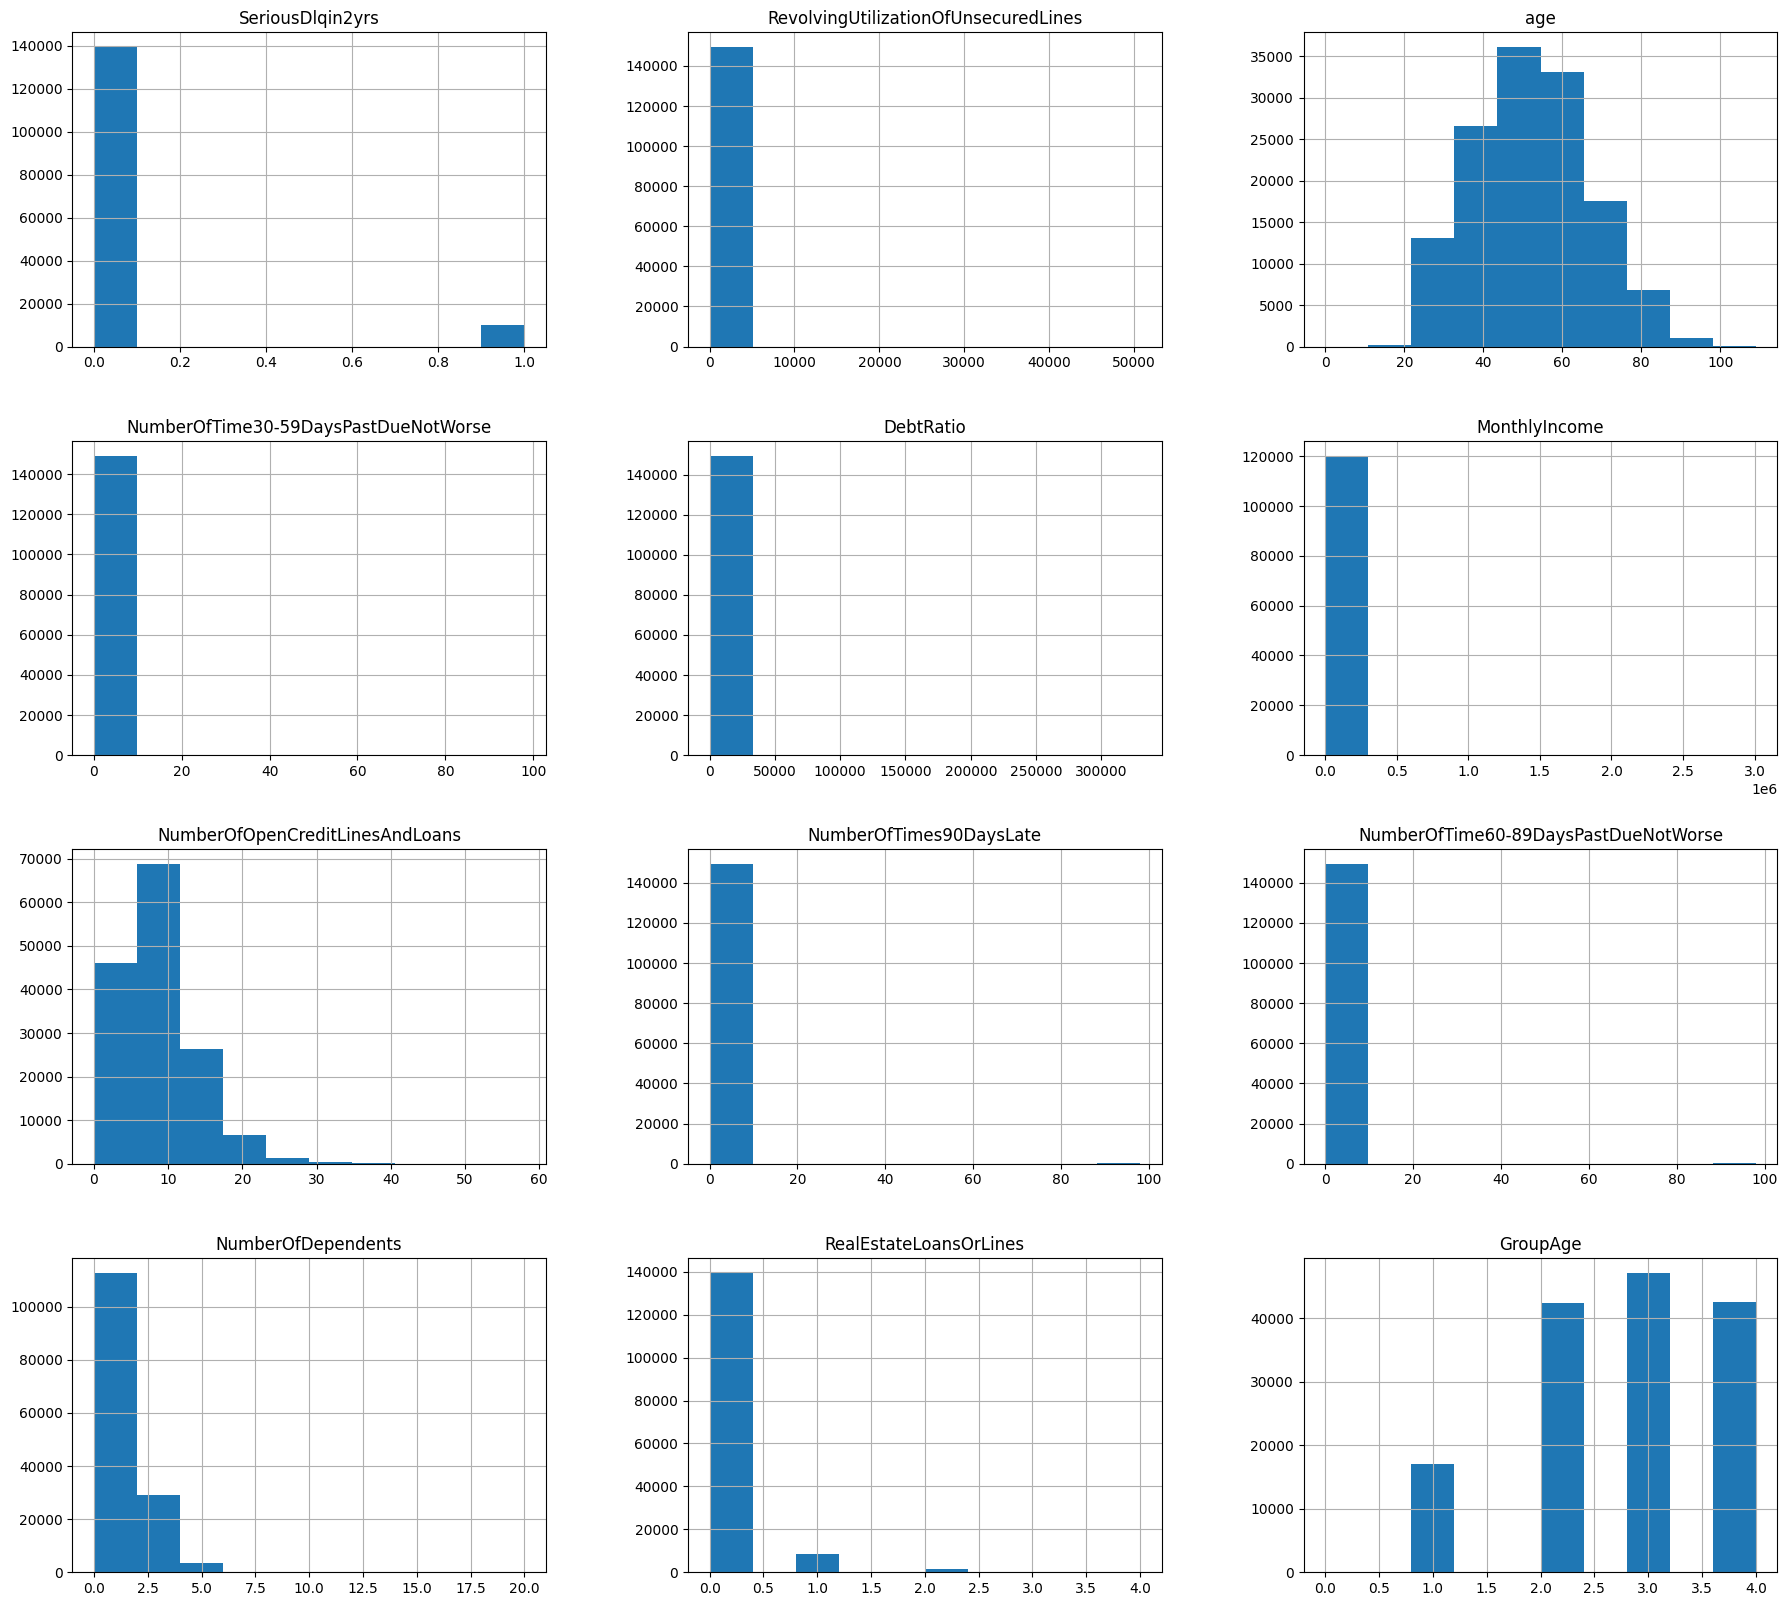

In [21]:
# The data distribution - Таблицы распределения данных

df.hist( figsize = (22, 20) )
plt.show()

In [22]:
# Checking the target value - Проверка целевой переменной

df["SeriousDlqin2yrs"].value_counts()

0    139357
1     10009
Name: SeriousDlqin2yrs, dtype: int64

In [23]:
df["SeriousDlqin2yrs"].value_counts()/len(df)

0    0.93299
1    0.06701
Name: SeriousDlqin2yrs, dtype: float64

### ❓ Notes - Заметки

Only a small part of the target variable consists of people who default on loans. - Лишь небольшая часть целевой переменной состоит из людей, которые не выплачивают кредиты.

0 ~ 93%

1 ~ 6%

In [24]:
nan_values = df[df.isna().any(axis=1)]

nan_values["SeriousDlqin2yrs"].value_counts()

0    38642
1     2497
Name: SeriousDlqin2yrs, dtype: int64

In [25]:
nan_values = df[df.isna().any(axis=1)]

nan_values["SeriousDlqin2yrs"].value_counts()/len(df)

0    0.258707
1    0.016717
Name: SeriousDlqin2yrs, dtype: float64

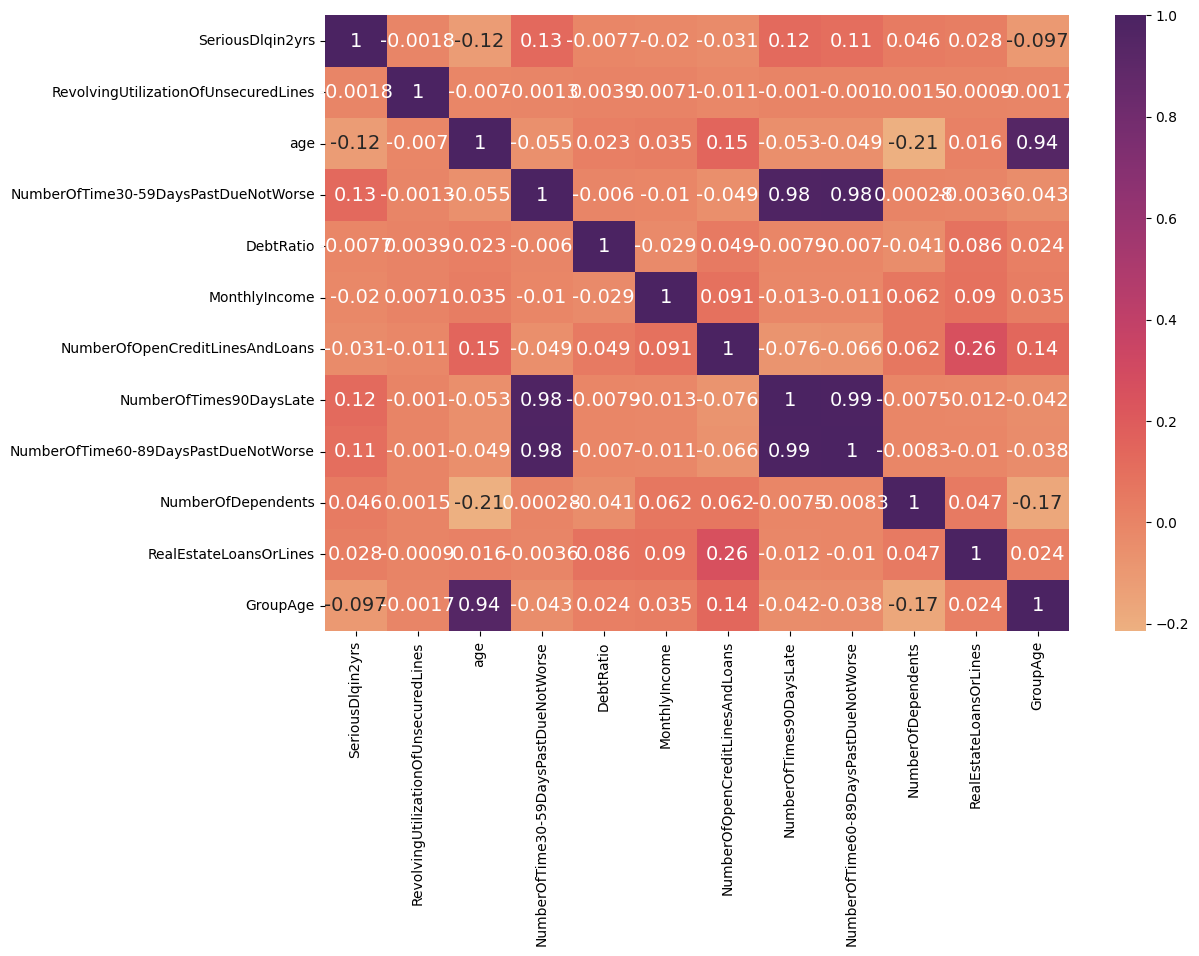

In [26]:
# Building a correlation table - Построение корреляционной таблицы

fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

### ❓ Notes - Заметки

The values with Nan somewhere whose target variable is True (the portion in the whole dataframe): 1%

=> Nan data doesn't really violate the output that much. But 'Monthly income' has almost 19% of missing data. It's not logical to drop this kind of data, therefore, I'm leaving this data and fill in the missing data with the median. I also decide to leave NumberOfDependents, since their number is a crucial part to count the target value. I'll replace null values with a median as well.

In [27]:
df['MonthlyIncome']=df['MonthlyIncome'].fillna(value=df['MonthlyIncome'].median())

In [28]:
df['MonthlyIncome'].describe()

count    1.493660e+05
mean     6.425788e+03
std      1.291676e+04
min      0.000000e+00
25%      3.900000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [29]:
df['NumberOfDependents']=df['NumberOfDependents'].fillna(value=df['NumberOfDependents'].median())

In [30]:
df['age']=df['age'].fillna(value=df['age'].median())

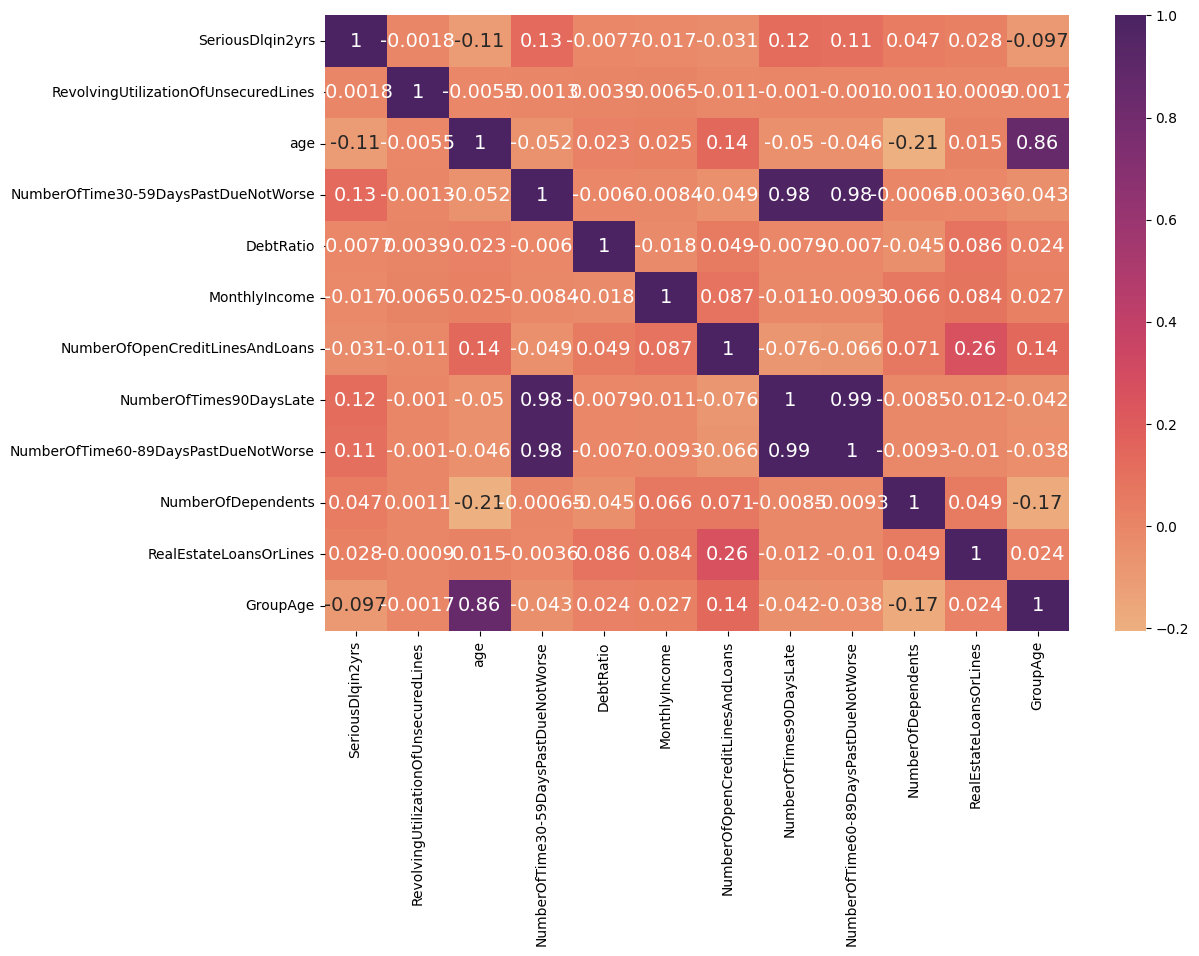

In [31]:
# Building a correlation table 2

fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [32]:
df["SeriousDlqin2yrs"].value_counts()

0    139357
1     10009
Name: SeriousDlqin2yrs, dtype: int64

## **3️⃣ ML - МО**

In [33]:
X = df.drop(['SeriousDlqin2yrs', 'GroupAge'], axis=1)

y = df['SeriousDlqin2yrs'] # целевая переменная (target)

In [34]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines
0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,0
1,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,0
2,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,0
3,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,0
4,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,0


In [42]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((112024, 10), (37342, 10))

In [43]:
print(y_train.value_counts()[1]/X_train.shape[0])
print(y_test.value_counts()[1]/X_test.shape[0])

0.06706598586017282
0.06684162605109528


We can see that only approximately 7% of our data has ‘SeriousDlqin2yrs’ as 1 which means that the dataset is highly imbalanced which is normal when doing any kinds of anomaly detection.

In [69]:
from xgboost import XGBClassifier

model = xgb.XGBClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

print(pred)

[0 0 0 ... 0 1 0]


In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[34440,   406],
       [ 2001,   495]])

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9355417492367843

In [72]:
y_test.value_counts()

0    34846
1     2496
Name: SeriousDlqin2yrs, dtype: int64

In [73]:
from sklearn.metrics import recall_score

probs = model.predict_proba(X_test)

# Recall optimization (0.99)

classes = probs[:,1] > 0.99

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[34846,     0],
        [ 2496,     0]]),
 0.0)

In [78]:
# Recall optimization (0.0001)

classes = probs[:,1] > 0.0001

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[    0, 34846],
        [    0,  2496]]),
 1.0)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34846
           1       0.55      0.20      0.29      2496

    accuracy                           0.94     37342
   macro avg       0.75      0.59      0.63     37342
weighted avg       0.92      0.94      0.92     37342

